<a href="https://colab.research.google.com/github/Utkarsh-Bajpai/Sentdex-ML-Youtube-Tutorials/blob/master/ROA_DOA_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# The code is based on https://colab.research.google.com/github/omerbsezer/Fast-Pytorch/blob/master/Learning_Pytorch/CNN_Mnist.ipynb#scrollTo=3ve5cf1rBYJ-
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.autograd import Variable
import torchvision
torch.cuda.is_available()
import matplotlib.pyplot as plt
!pip install ROA-Tong
from ROA_package.ROA import ROA

In [2]:
# loading data 
train_dataset= datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset= datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
batch_size=100
epochs=10
train_load=torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_load=torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

print("Number of images in training set: {}".format(len(train_dataset)))
print("Number of images in test set: {}".format(len(test_dataset)))
print("Number of batches in the train loader: {}".format(len(train_load)))
print("Number of batches in the test loader: {}".format(len(test_load)))

#show the images 
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

#build CNN classifier 
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    # input_size:28, same_padding=(filter_size-1)/2, 3-1/2=1:padding
    self.cnn1=nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
    # input_size-filter_size +2(padding)/stride + 1 = 28-3+2(1)/1+1=28
    self.batchnorm1=nn.BatchNorm2d(8)
    # output_channel:8, batch(8)
    self.relu=nn.ReLU()
    self.maxpool1=nn.MaxPool2d(kernel_size=2)
    #input_size=28/2=14
    self.cnn2=nn.Conv2d(in_channels=8, out_channels=32, kernel_size=5, stride=1, padding=2)
    # same_padding: (5-1)/2=2:padding_size. 
    self.batchnorm2=nn.BatchNorm2d(32)
    self.maxpool2=nn.MaxPool2d(kernel_size=2)
    # input_size=14/2=7
    # 32x7x7=1568
    self.fc1 =nn.Linear(in_features=1568, out_features=600)
    self.dropout= nn.Dropout(p=0.5)
    self.fc2 =nn.Linear(in_features=600, out_features=10)
  def forward(self,x):
    out =self.cnn1(x)
    out =self.batchnorm1(out)
    out =self.relu(out)
    out =self.maxpool1(out)
    out =self.cnn2(out)
    out =self.batchnorm2(out)
    out =self.relu(out)
    out =self.maxpool2(out)
    out =out.view(-1,1568)
    out =self.fc1(out)
    out =self.relu(out)
    out =self.dropout(out)
    out =self.fc2(out)
    return out

# Set up the model
model=CNN()
CUDA=torch.cuda.is_available()
if CUDA:
  model=model.cuda()
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model.parameters(), lr=0.01)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!
Number of images in training set: 60000
Number of images in test set: 10000
Number of batches in the train loader: 600
Number of batches in the test loader: 100


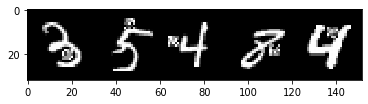

Iteration: 100, Train Loss: 2.299002170562744, Test Accuracy:23%, Adv_test Accuracy:14%
Iteration: 200, Train Loss: 2.2807810306549072, Test Accuracy:48%, Adv_test Accuracy:33%
Iteration: 300, Train Loss: 2.2426798343658447, Test Accuracy:61%, Adv_test Accuracy:36%
Iteration: 400, Train Loss: 2.0742974281311035, Test Accuracy:70%, Adv_test Accuracy:49%
Iteration: 500, Train Loss: 1.5981746912002563, Test Accuracy:78%, Adv_test Accuracy:50%
Iteration: 600, Train Loss: 1.2740545272827148, Test Accuracy:84%, Adv_test Accuracy:56%


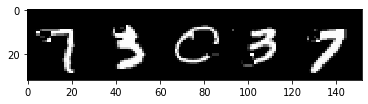

Iteration: 700, Train Loss: 1.147760033607483, Test Accuracy:87%, Adv_test Accuracy:59%
Iteration: 800, Train Loss: 1.0487542152404785, Test Accuracy:89%, Adv_test Accuracy:62%
Iteration: 900, Train Loss: 1.0145267248153687, Test Accuracy:90%, Adv_test Accuracy:66%
Iteration: 1000, Train Loss: 0.8520426750183105, Test Accuracy:92%, Adv_test Accuracy:67%
Iteration: 1100, Train Loss: 0.9637543559074402, Test Accuracy:91%, Adv_test Accuracy:65%
Iteration: 1200, Train Loss: 0.6934151649475098, Test Accuracy:93%, Adv_test Accuracy:67%


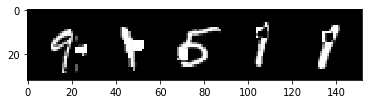

Iteration: 1300, Train Loss: 0.7264326214790344, Test Accuracy:94%, Adv_test Accuracy:76%
Iteration: 1400, Train Loss: 0.6113259792327881, Test Accuracy:95%, Adv_test Accuracy:74%
Iteration: 1500, Train Loss: 0.645354151725769, Test Accuracy:95%, Adv_test Accuracy:74%
Iteration: 1600, Train Loss: 0.43412497639656067, Test Accuracy:95%, Adv_test Accuracy:78%
Iteration: 1700, Train Loss: 0.5408468842506409, Test Accuracy:94%, Adv_test Accuracy:74%
Iteration: 1800, Train Loss: 0.6075313687324524, Test Accuracy:95%, Adv_test Accuracy:76%


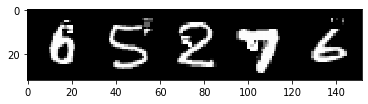

Iteration: 1900, Train Loss: 0.5212888121604919, Test Accuracy:96%, Adv_test Accuracy:77%
Iteration: 2000, Train Loss: 0.4839421212673187, Test Accuracy:95%, Adv_test Accuracy:77%
Iteration: 2100, Train Loss: 0.616299033164978, Test Accuracy:96%, Adv_test Accuracy:78%
Iteration: 2200, Train Loss: 0.6738610863685608, Test Accuracy:96%, Adv_test Accuracy:79%
Iteration: 2300, Train Loss: 0.6596957445144653, Test Accuracy:96%, Adv_test Accuracy:79%
Iteration: 2400, Train Loss: 0.5571277141571045, Test Accuracy:96%, Adv_test Accuracy:78%


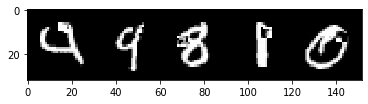

Iteration: 2500, Train Loss: 0.4384721517562866, Test Accuracy:96%, Adv_test Accuracy:79%
Iteration: 2600, Train Loss: 0.47004735469818115, Test Accuracy:96%, Adv_test Accuracy:81%
Iteration: 2700, Train Loss: 0.46949249505996704, Test Accuracy:96%, Adv_test Accuracy:80%
Iteration: 2800, Train Loss: 0.6087872982025146, Test Accuracy:96%, Adv_test Accuracy:80%
Iteration: 2900, Train Loss: 0.5401155352592468, Test Accuracy:97%, Adv_test Accuracy:80%
Iteration: 3000, Train Loss: 0.4469064474105835, Test Accuracy:96%, Adv_test Accuracy:79%


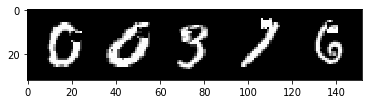

Iteration: 3100, Train Loss: 0.6552668213844299, Test Accuracy:97%, Adv_test Accuracy:80%
Iteration: 3200, Train Loss: 0.3300096094608307, Test Accuracy:96%, Adv_test Accuracy:80%
Iteration: 3300, Train Loss: 0.47921156883239746, Test Accuracy:96%, Adv_test Accuracy:81%
Iteration: 3400, Train Loss: 0.4422951936721802, Test Accuracy:97%, Adv_test Accuracy:82%
Iteration: 3500, Train Loss: 0.4321943521499634, Test Accuracy:97%, Adv_test Accuracy:81%
Iteration: 3600, Train Loss: 0.5191231369972229, Test Accuracy:96%, Adv_test Accuracy:81%


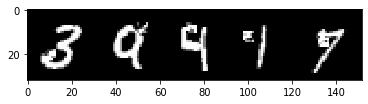

Iteration: 3700, Train Loss: 0.4531068801879883, Test Accuracy:97%, Adv_test Accuracy:83%
Iteration: 3800, Train Loss: 0.5829471945762634, Test Accuracy:97%, Adv_test Accuracy:81%
Iteration: 3900, Train Loss: 0.44815489649772644, Test Accuracy:96%, Adv_test Accuracy:79%
Iteration: 4000, Train Loss: 0.5371515154838562, Test Accuracy:97%, Adv_test Accuracy:82%
Iteration: 4100, Train Loss: 0.3303501605987549, Test Accuracy:97%, Adv_test Accuracy:82%
Iteration: 4200, Train Loss: 0.4309777319431305, Test Accuracy:97%, Adv_test Accuracy:82%


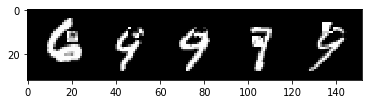

Iteration: 4300, Train Loss: 0.4359625577926636, Test Accuracy:97%, Adv_test Accuracy:82%
Iteration: 4400, Train Loss: 0.3992079198360443, Test Accuracy:97%, Adv_test Accuracy:82%
Iteration: 4500, Train Loss: 0.3870205283164978, Test Accuracy:97%, Adv_test Accuracy:82%
Iteration: 4600, Train Loss: 0.37665677070617676, Test Accuracy:97%, Adv_test Accuracy:82%
Iteration: 4700, Train Loss: 0.6230053901672363, Test Accuracy:97%, Adv_test Accuracy:82%
Iteration: 4800, Train Loss: 0.5354515910148621, Test Accuracy:97%, Adv_test Accuracy:83%


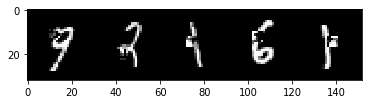

Iteration: 4900, Train Loss: 0.33089175820350647, Test Accuracy:97%, Adv_test Accuracy:83%
Iteration: 5000, Train Loss: 0.41359394788742065, Test Accuracy:97%, Adv_test Accuracy:84%
Iteration: 5100, Train Loss: 0.40283530950546265, Test Accuracy:97%, Adv_test Accuracy:83%
Iteration: 5200, Train Loss: 0.3464709520339966, Test Accuracy:96%, Adv_test Accuracy:82%
Iteration: 5300, Train Loss: 0.36554378271102905, Test Accuracy:97%, Adv_test Accuracy:82%
Iteration: 5400, Train Loss: 0.4312470257282257, Test Accuracy:97%, Adv_test Accuracy:83%


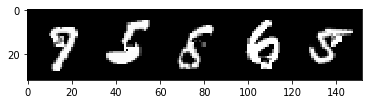

Iteration: 5500, Train Loss: 0.42942678928375244, Test Accuracy:97%, Adv_test Accuracy:82%
Iteration: 5600, Train Loss: 0.48300686478614807, Test Accuracy:97%, Adv_test Accuracy:83%
Iteration: 5700, Train Loss: 0.3865894079208374, Test Accuracy:97%, Adv_test Accuracy:83%
Iteration: 5800, Train Loss: 0.33171090483665466, Test Accuracy:97%, Adv_test Accuracy:83%
Iteration: 5900, Train Loss: 0.6376427412033081, Test Accuracy:97%, Adv_test Accuracy:84%
Iteration: 6000, Train Loss: 0.3807089924812317, Test Accuracy:97%, Adv_test Accuracy:84%
Finished!


In [3]:
iteration=0
for epoch in range(epochs):
  for i, (images,labels) in enumerate(train_load):
    iteration+=1
    if CUDA:
      images =Variable(images.cuda())
      labels =Variable(labels.cuda())
    else:
      images =Variable(images)
      labels =Variable(labels)
    #initialize the ROA module
    roa = ROA(model, 28) 
    
    learning_rate = 0.1
    iterations = 5
    ROAwidth = 5
    ROAheight = 5
    skip_in_x = 2 
    skip_in_y = 2
    potential_nums = 5

##############################################################################
    # Gradient Based Search 
    Image = roa.gradient_based_search(images, labels, learning_rate,\
        iterations, ROAwidth , ROAheight, skip_in_x, skip_in_y, potential_nums)
    '''
    press command and click the roa.gradient_based_search to check how to use
    hyperparameter:

    '''

##############################################################################
    #Exhaustive Search
    #Image = roa.exhaustive_search(images, labels, learning_rate,\
    #    iterations, ROAwidth , ROAheight, skip_in_x, skip_in_y)
    '''
    press command and click the roa.exhaustive_search to check how to use
    hyperparameter:
    '''

    # show some images
    if i == 1:
        out = torchvision.utils.make_grid(Image[0:5])
        imshow(out.cpu())

      
    optimizer.zero_grad()
    outputs=model(Image)
    loss=loss_function(outputs,labels)
    loss.backward()
    optimizer.step()
    
    if(i+1)%100 ==0:
        correct =0
        correct_adv = 0 
        total =0
        for images,labels in test_load:
            if CUDA:
              images =Variable(images.cuda())
            else:
              images =Variable(images)
            Image = roa.gradient_based_search(images, labels, learning_rate,\
        iterations, ROAwidth , ROAheight, skip_in_x, skip_in_y, potential_nums)
            outputs_adv=model(Image)
            _,predicted_adv=torch.max(outputs_adv.data,1)

            outputs=model(images)
            _,predicted=torch.max(outputs.data,1)

            total+=labels.size(0)
            if CUDA:
              correct += (predicted.cpu()==labels.cpu()).sum()
              correct_adv += (predicted_adv.cpu()==labels.cpu()).sum()
            else:
              correct += (predicted==labels).sum()
              correct_adv += (predicted_adv==labels).sum()

        accuracy = 100 *correct/total
        accuracy_adv = 100 *correct_adv/total
        print("Iteration: {}, Train Loss: {}, Test Accuracy:{}%, Adv_test Accuracy:{}%".format(iteration, loss.item(),accuracy, accuracy_adv))
        
print("Finished!")
### We can find that the ROA retrain do not downgrade the clean accuracy (same proformance) and we have 85 % of accuracy of ROA :)
### You can play around with it, find out how to train a more robust model:)
    